In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df_real = pd.read_csv(
    "../data/train_small_cleaned.csv",
)

In [3]:
# df_synthetic = pd.read_csv(
#     "../data/train_small_synthetic_cleaned.csv",
# )

In [4]:
import pyarrow.parquet as pq
df_synthetic = pq.read_table('../data/synthetic_gps_data.parquet').to_pandas()
df_synthetic['POLYLINE'] = df_synthetic['POLYLINE'].apply(lambda x: str([(y[1], y[0]) for y in eval(x)]))
df_synthetic['START_POSITION'] = df_synthetic['POLYLINE'].apply(lambda x: eval(x)[0])
df_synthetic['END_POSITION'] = df_synthetic['POLYLINE'].apply(lambda x: eval(x)[-1])
df_synthetic['TRIP_DISTANCE'] = df_synthetic['ROUTE_LENGTH']
df_synthetic.drop(columns=['ROUTE_LENGTH'], inplace=True)
df_synthetic.sample(5)

,TIMESTAMP,TRIP_DURATION,TRIP_LENGTH,START_POSITION_LAT,START_POSITION_LONG,END_POSITION_LAT,END_POSITION_LONG,POLYLINE,START_POSITION,END_POSITION,TRIP_DISTANCE
598,1385662159,575.8,40,41.147235,-8.585892,41.179374,-8.664291,"[(41.1471643, -8.5857206), (41.146951327945644...","(41.1471643, -8.5857206)","(41.1792534, -8.663132)",10564.463
858,1399643791,529.3,37,41.149188,-8.603685,41.173794,-8.656002,"[(41.1493955, -8.6041093), (41.14923846947754,...","(41.1493955, -8.6041093)","(41.1736673, -8.6565863)",7107.697
702,1383627408,362.1,26,41.156136,-8.619984,41.181741,-8.605746,"[(41.1562894, -8.6193259), (41.15506638507669,...","(41.1562894, -8.6193259)","(41.1802304, -8.6051506)",4841.438
963,1376654376,298.0,21,41.148279,-8.627256,41.167638,-8.614566,"[(41.1481224, -8.627145), (41.14950159814126, ...","(41.1481224, -8.627145)","(41.1679596, -8.6144176)",3900.879
541,1375537786,542.0,38,41.150394,-8.611893,41.208282,-8.610660,"[(41.1502687, -8.6120989), (41.149945684278705...","(41.1502687, -8.6120989)","(41.2080218, -8.6102318)",7300.297


In [10]:
df_synthetic['POLYLINE'] = df_synthetic['POLYLINE'].apply(lambda x: str(x))
df_synthetic['START_POSITION'] = df_synthetic['START_POSITION'].apply(lambda x: str(x))
df_synthetic['END_POSITION'] = df_synthetic['END_POSITION'].apply(lambda x: str(x))

In [11]:
df_synthetic.sample(5)

,TIMESTAMP,TRIP_DURATION,TRIP_LENGTH,START_POSITION_LAT,START_POSITION_LONG,END_POSITION_LAT,END_POSITION_LONG,POLYLINE,START_POSITION,END_POSITION,TRIP_DISTANCE
433,1398243523,496.3,35,41.145840,-8.611794,41.146821,-8.556246,"[(41.1459905, -8.6122361), (41.14444490807085,...","(41.1459905, -8.6122361)","(41.1469971, -8.555948)",6818.374
211,1395753211,158.0,12,41.148513,-8.610975,41.152320,-8.630118,"[(41.147888, -8.6112856), (41.14822131088881, ...","(41.147888, -8.6112856)","(41.1525836, -8.6306176)",2001.431
955,1375296665,334.9,24,41.154327,-8.610903,41.164812,-8.650413,"[(41.1542418, -8.6100567), (41.153638489040844...","(41.1542418, -8.6100567)","(41.1649404, -8.6505953)",4530.271
157,1388264346,115.7,9,41.157756,-8.599500,41.152770,-8.591715,"[(41.1575282, -8.59892), (41.15725287931381, -...","(41.1575282, -8.59892)","(41.1527835, -8.591762)",1345.183
13,1390907007,128.8,10,41.173524,-8.599239,41.172183,-8.586729,"[(41.1737693, -8.5992093), (41.17216548913998,...","(41.1737693, -8.5992093)","(41.1720859, -8.5869556)",1677.431


In [12]:
df_real = df_real.sample(df_synthetic.shape[0])

In [13]:
df_real.shape, df_synthetic.shape

((981, 8), (981, 11))

In [14]:
df_real.sample(5)

,TRIP_ID,TIMESTAMP,TRIP_DURATION,TRIP_LENGTH,TRIP_DISTANCE,START_POSITION,END_POSITION,POLYLINE
23493,1396613139620000174,1396613139,900,60,4728.247915,"(41.172795, -8.612163)","(41.14395, -8.607573)","[(41.172795, -8.612163), (41.172759, -8.612514..."
152219,1385928314620000524,1385928314,705,47,10074.981109,"(41.154282, -8.649477)","(41.153607, -8.567883)","[(41.154282, -8.649477), (41.154201, -8.649981..."
92085,1394383334620000196,1394383334,435,29,2014.625675,"(41.159574, -8.591688)","(41.154669, -8.603424)","[(41.159574, -8.591688), (41.159601, -8.591643..."
10181,1375034523620000516,1375034523,525,35,3420.408228,"(41.145651, -8.61075)","(41.154228, -8.613936)","[(41.145651, -8.61075), (41.145696, -8.610768)..."
14874,1399577097620000521,1399577097,1425,95,9795.240128,"(41.161014, -8.628903)","(41.194323, -8.645346)","[(41.161014, -8.628903), (41.160888, -8.628615..."


In [15]:
df_synthetic.sample(5)

,TIMESTAMP,TRIP_DURATION,TRIP_LENGTH,START_POSITION_LAT,START_POSITION_LONG,END_POSITION_LAT,END_POSITION_LONG,POLYLINE,START_POSITION,END_POSITION,TRIP_DISTANCE
613,1383354423,405.6,29,41.140665,-8.618760,41.180778,-8.607402,"[(41.1409169, -8.6174342), (41.140813901832985...","(41.1409169, -8.6174342)","(41.1811376, -8.609393)",5537.286
456,1388073382,287.8,21,41.162436,-8.600022,41.176413,-8.623593,"[(41.1632619, -8.5995483), (41.161505445540406...","(41.1632619, -8.5995483)","(41.1763316, -8.6239254)",3862.830
245,1384557299,544.8,38,41.181795,-8.689338,41.157234,-8.608545,"[(41.1818594, -8.688804), (41.18200699870194, ...","(41.1818594, -8.688804)","(41.1574762, -8.6081083)",8977.321
289,1374076325,460.0,32,41.182677,-8.582553,41.163588,-8.630388,"[(41.1826309, -8.5827409), (41.18091028628338,...","(41.1826309, -8.5827409)","(41.1634261, -8.6294737)",7433.752
68,1374479776,426.5,30,41.148279,-8.590815,41.125770,-8.627931,"[(41.1481785, -8.590479), (41.14709187595791, ...","(41.1481785, -8.590479)","(41.1257362, -8.6283105)",7821.342


In [16]:
df_real_data = df_real.copy()
df_real_data = df_real_data[['START_POSITION', 'END_POSITION', 'TRIP_DURATION']]
df_real_data['START_POSITION_LATITUDE'] = df_real_data['START_POSITION'].apply(lambda x: float(eval(x)[0]))
df_real_data['START_POSITION_LONGITUDE'] = df_real_data['START_POSITION'].apply(lambda x: float(eval(x)[1]))
df_real_data['END_POSITION_LATITUDE'] = df_real_data['END_POSITION'].apply(lambda x: float(eval(x)[0]))
df_real_data['END_POSITION_LONGITUDE'] = df_real_data['END_POSITION'].apply(lambda x: float(eval(x)[1]))
df_real_data = df_real_data.drop(columns=['START_POSITION', 'END_POSITION'])

df_synthetic_data = df_synthetic.copy()
df_synthetic_data = df_synthetic_data[['START_POSITION', 'END_POSITION', 'TRIP_DURATION']]
df_synthetic_data['START_POSITION_LATITUDE'] = df_synthetic_data['START_POSITION'].apply(lambda x: float(eval(x)[0]))
df_synthetic_data['START_POSITION_LONGITUDE'] = df_synthetic_data['START_POSITION'].apply(lambda x: float(eval(x)[1]))
df_synthetic_data['END_POSITION_LATITUDE'] = df_synthetic_data['END_POSITION'].apply(lambda x: float(eval(x)[0]))
df_synthetic_data['END_POSITION_LONGITUDE'] = df_synthetic_data['END_POSITION'].apply(lambda x: float(eval(x)[1]))
df_synthetic_data = df_synthetic_data.drop(columns=['START_POSITION', 'END_POSITION'])                                                                                    
                                                                                     

In [17]:
df_real_data['DELTA_LATITUDE'] = df_real_data['END_POSITION_LATITUDE'] - df_real_data['START_POSITION_LATITUDE']
df_real_data['DELTA_LONGITUDE'] = df_real_data['END_POSITION_LONGITUDE'] - df_real_data['START_POSITION_LONGITUDE']

df_synthetic_data['DELTA_LATITUDE'] = df_synthetic_data['END_POSITION_LATITUDE'] - df_synthetic_data['START_POSITION_LATITUDE']
df_synthetic_data['DELTA_LONGITUDE'] = df_synthetic_data['END_POSITION_LONGITUDE'] - df_synthetic_data['START_POSITION_LONGITUDE']

In [18]:
# Trip duration from seconds to minutes
df_real_data['TRIP_DURATION'] = df_real_data['TRIP_DURATION'] / 60
df_synthetic_data['TRIP_DURATION'] = df_synthetic_data['TRIP_DURATION'] / 60

In [19]:
df_real_data = df_real_data.sample(frac=0.5)
df_synthetic_data = df_synthetic_data.sample(frac=0.5)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [21]:
# Split data into training and testing

X_real = df_real_data.drop(columns=['TRIP_DURATION'])
y_real = df_real_data['TRIP_DURATION']

X_synthetic = df_synthetic_data.drop(columns=['TRIP_DURATION'])
y_synthetic = df_synthetic_data['TRIP_DURATION']

X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)
X_synthetic_train, X_synthetic_test, y_synthetic_train, y_synthetic_test = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=42)

X_real_train.shape, X_real_test.shape, y_real_train.shape, y_real_test.shape

((392, 6), (98, 6), (392,), (98,))

In [22]:
# Train a Support Vector Regressor
model_svm_real = SVR()
model_svm_real.fit(X_real_train, y_real_train)

model_svm_synthetic = SVR()
model_svm_synthetic.fit(X_synthetic_train, y_synthetic_train)

SVR()

In [23]:
# Train a KNN Regressor
model_knn_real = KNeighborsRegressor()
model_knn_real.fit(X_real_train, y_real_train)

model_knn_synthetic = KNeighborsRegressor()
model_knn_synthetic.fit(X_synthetic_train, y_synthetic_train)

KNeighborsRegressor()

In [24]:
# Train a Random Forest Regressor
model_rf_real = RandomForestRegressor()
model_rf_real.fit(X_real_train, y_real_train)

model_rf_synthetic = RandomForestRegressor()
model_rf_synthetic.fit(X_synthetic_train, y_synthetic_train)

RandomForestRegressor()

In [25]:
# Train a Linear Regression
model_lr_real = LinearRegression()
model_lr_real.fit(X_real_train, y_real_train)

model_lr_synthetic = LinearRegression()
model_lr_synthetic.fit(X_synthetic_train, y_synthetic_train)

LinearRegression()

In [26]:
# Train a Gradient Boosting Regressor
model_gb_real = GradientBoostingRegressor()
model_gb_real.fit(X_real_train, y_real_train)

model_gb_synthetic = GradientBoostingRegressor()
model_gb_synthetic.fit(X_synthetic_train, y_synthetic_train)

GradientBoostingRegressor()

In [27]:
# Evaluate the both models on the real data test set
y_real_pred_knn = model_knn_real.predict(X_real_test)
mse_knn_real = mean_absolute_error(y_real_test, y_real_pred_knn)
y_synthetic_pred_knn = model_knn_synthetic.predict(X_synthetic_test)
mse_knn_synthetic = mean_absolute_error(y_synthetic_test, y_synthetic_pred_knn)

In [28]:
y_real_pred_lr = model_lr_real.predict(X_real_test)
mse_lr_real = mean_absolute_error(y_real_test, y_real_pred_lr)
y_synthetic_pred_lr = model_lr_synthetic.predict(X_synthetic_test)
mse_lr_synthetic = mean_absolute_error(y_synthetic_test, y_synthetic_pred_lr)

In [29]:
y_real_pred_gb = model_gb_real.predict(X_real_test)
mse_gb_real = mean_absolute_error(y_real_test, y_real_pred_gb)
y_synthetic_pred_gb = model_gb_synthetic.predict(X_synthetic_test)
mse_gb_synthetic = mean_absolute_error(y_synthetic_test, y_synthetic_pred_gb)

In [30]:
y_real_pred_rf = model_rf_real.predict(X_real_test)
mse_rf_real = mean_absolute_error(y_real_test, y_real_pred_rf)
y_synthetic_pred_rf = model_rf_synthetic.predict(X_synthetic_test)
mse_rf_synthetic = mean_absolute_error(y_synthetic_test, y_synthetic_pred_rf)

In [31]:
y_real_pred_svm = model_svm_real.predict(X_real_test)
mse_svm_real = mean_absolute_error(y_real_test, y_real_pred_svm)
y_synthetic_pred_svm = model_svm_synthetic.predict(X_synthetic_test)
mse_svm_synthetic = mean_absolute_error(y_synthetic_test, y_synthetic_pred_svm)

In [32]:
# Create a DataFrame to compare the models
df_results = pd.DataFrame({
    'Model': ['KNN', 'LR', 'GB', 'RF', 'SVM'],
    'Real': [mse_knn_real, mse_lr_real, mse_gb_real, mse_rf_real, mse_svm_real],
    'Synthetic': [mse_knn_synthetic, mse_lr_synthetic, mse_gb_synthetic, mse_rf_synthetic, mse_svm_synthetic]
})

df_results.sort_values(by='Real', ascending=False, inplace=True)

In [33]:
df_results

,Model,Real,Synthetic
1,LR,4.695384,2.512565
2,GB,4.458134,0.726893
4,SVM,4.231631,2.483068
0,KNN,3.865306,1.135697
3,RF,3.822117,0.846201


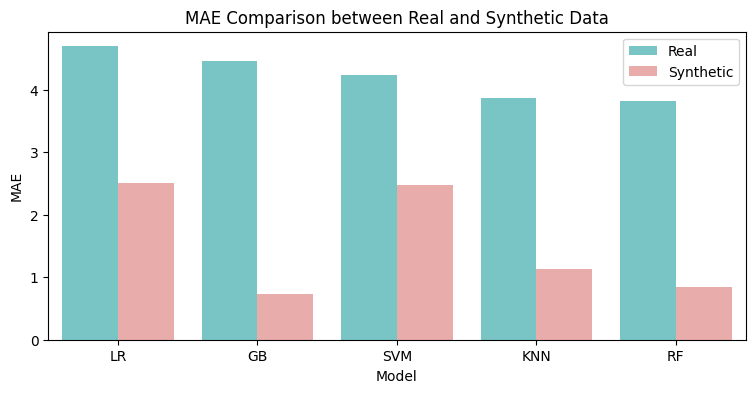

In [34]:
# Plot the results
df_results_plot = df_results.melt(id_vars='Model', var_name='Data', value_name='MAE')

fig, ax = plt.subplots(figsize=(9, 4))
plt.title('MAE Comparison between Real and Synthetic Data')
sns.barplot(x='Model', y='MAE', hue='Data', data=df_results_plot, palette=['#6CD1D2', '#F3A29F'], ax=ax)
plt.legend(title='')
plt.show()